In [218]:
%%capture
!pip install imblearn
!pip install xgboost

In [219]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set()

In [220]:
# importing dataset
data = pd.read_csv('data.csv')
data = data.drop(columns = ['id', 'Unnamed: 32']).copy()
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Analyse whether any data is missing, and get an idea of how the data looks

In [221]:
print(data.columns)
assert max(data.isnull().sum()) == 0
data.describe()

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

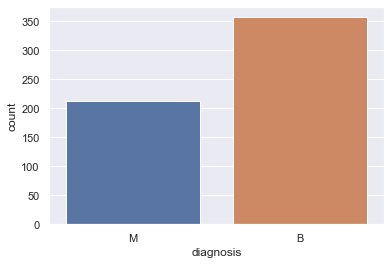

In [222]:
sns.countplot(x="diagnosis", data=data)

Exploratory analysis
---

Here we observe that malignant observations are larger in radius, thus also in area and perimeter. There is also a clear trend of more concavity points and higher values for concavity when the observation is malignant.

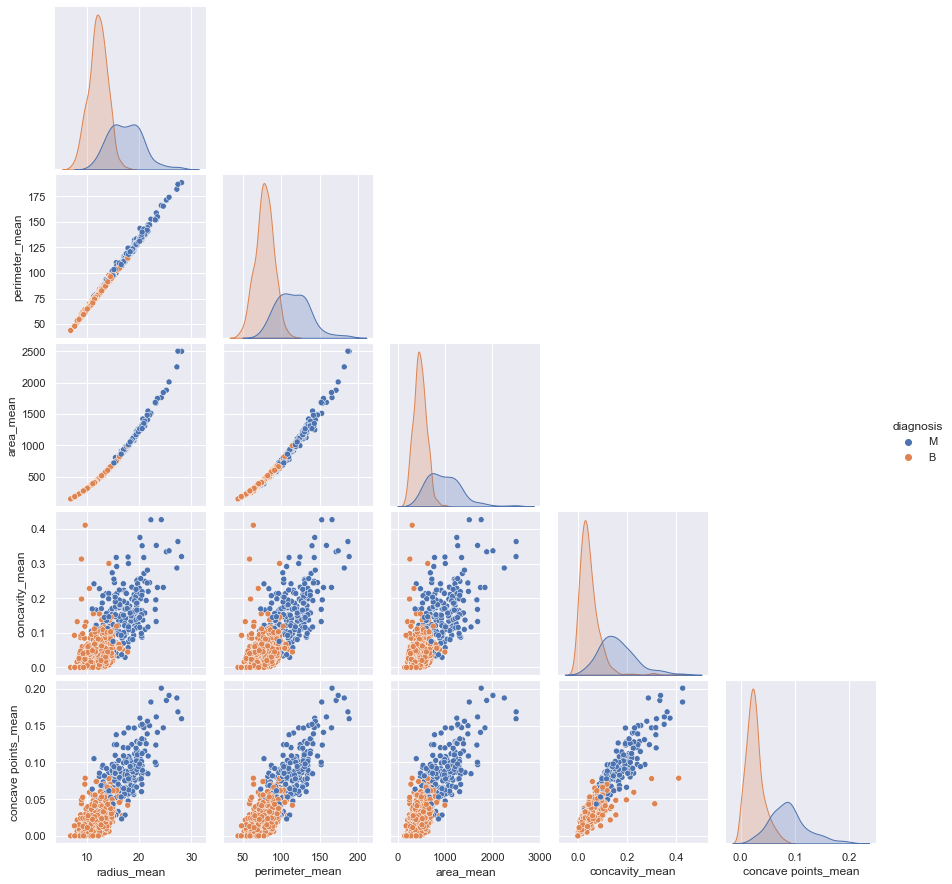

In [223]:
sns.pairplot(data=data, vars = data.iloc[:, [1,3,4,7,8]], hue = 'diagnosis', corner=True)

(10, 10)


<AxesSubplot:>

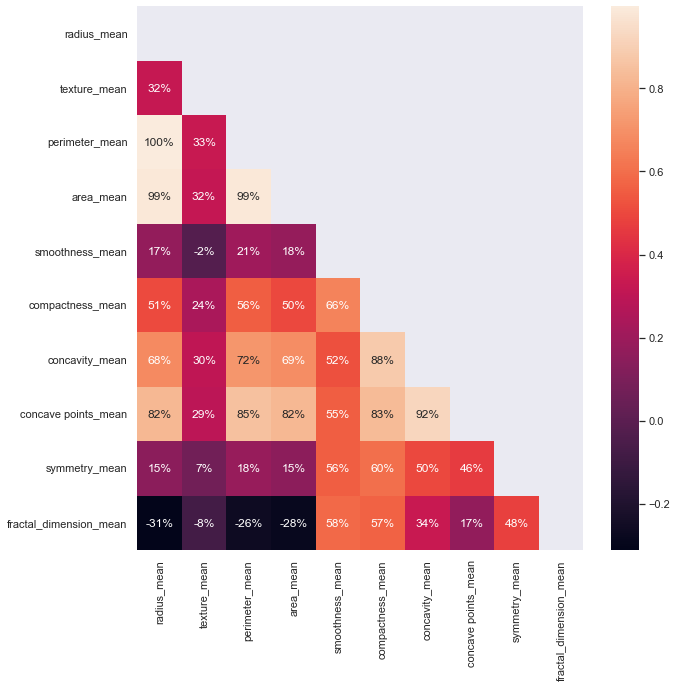

In [224]:
size = 10

plt.figure(figsize=(size, size))

mask = np.array([[True] * size] * size)
print(mask.shape)
for i in range(size):
    for j in range(i):
        mask[i][j] = False

correlated_data = data.iloc[:, :size+1].corr()
sns.heatmap(correlated_data, annot=True, fmt='.0%', mask=mask)

Preprocessing
---
Label encode diagnosis

Split the data into datapoints and results

In [225]:
from sklearn.preprocessing import LabelEncoder
data.iloc[:, 0] = LabelEncoder().fit_transform(data.iloc[:, 0].values)

X = data.drop(columns='diagnosis', axis = 1).copy()

y = data['diagnosis']
X.shape

(569, 30)

In [226]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [227]:
# imo je diskutabilne ake uzitocne je odstranovat takymto sposobom columns

# tak se vetsinou dela, ze proste odstranime sloupce hodne korelujici. Co by bylo lepsi podle tebe?
def find_correlated_features(X):
    correlated_features = set()
    correlation = X.corr()

    for i in range(len(correlation.columns)):
        for j in range(i):
            if (abs(correlation.iloc[i, j]) > 0.9 and abs(correlation.iloc[i, j]) != 1):
                colname = correlation.columns[i]
                correlated_features.add(colname)
    return correlated_features
correlated_features = find_correlated_features(X)
X = X.drop(columns=correlated_features, axis=1).copy()

print(X.shape)

correlated_features

(569, 20)


{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

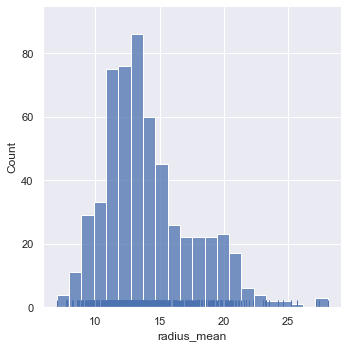

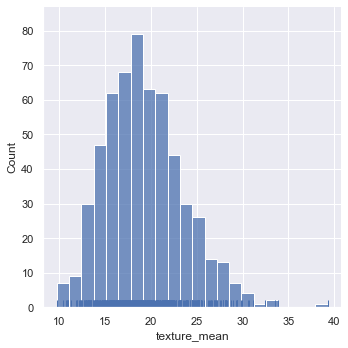

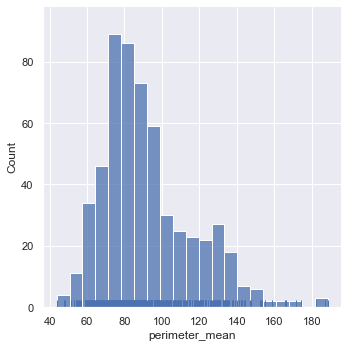

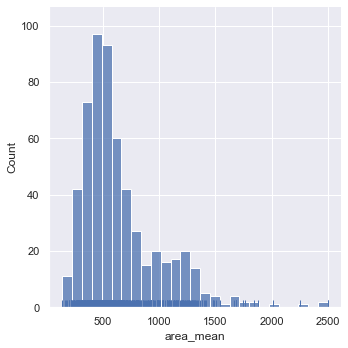

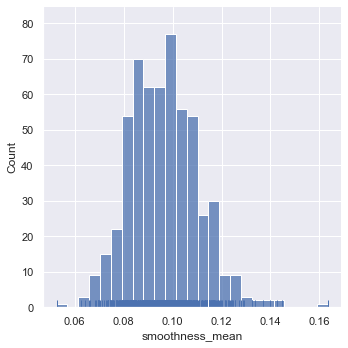

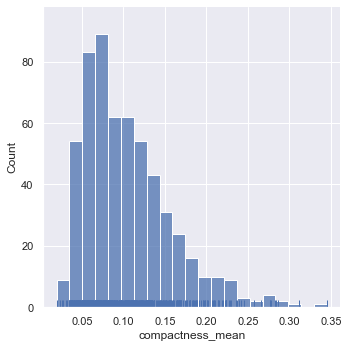

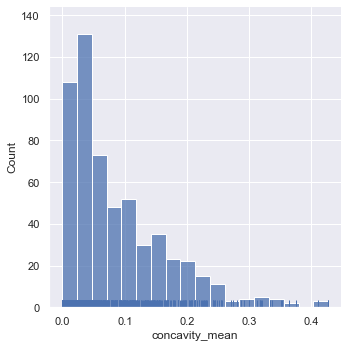

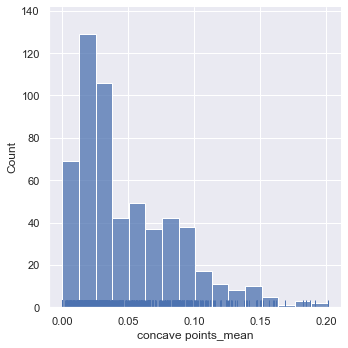

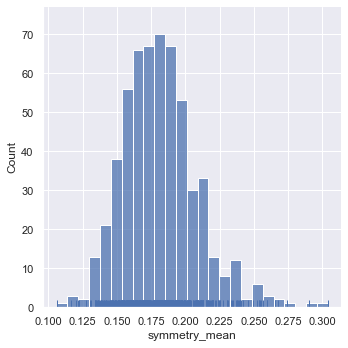

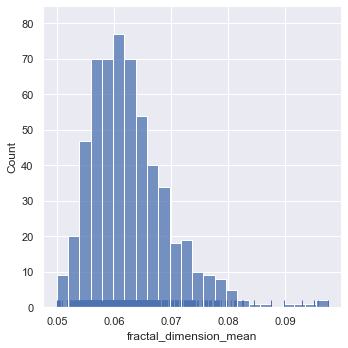

Outliers

In [229]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(LocalOutlierFactor())
outliers = pipeline.fit_predict(data)==-1
data["outlier"] = pd.Series(outliers)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,outlier
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,False
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,False
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,False
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,True
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,False


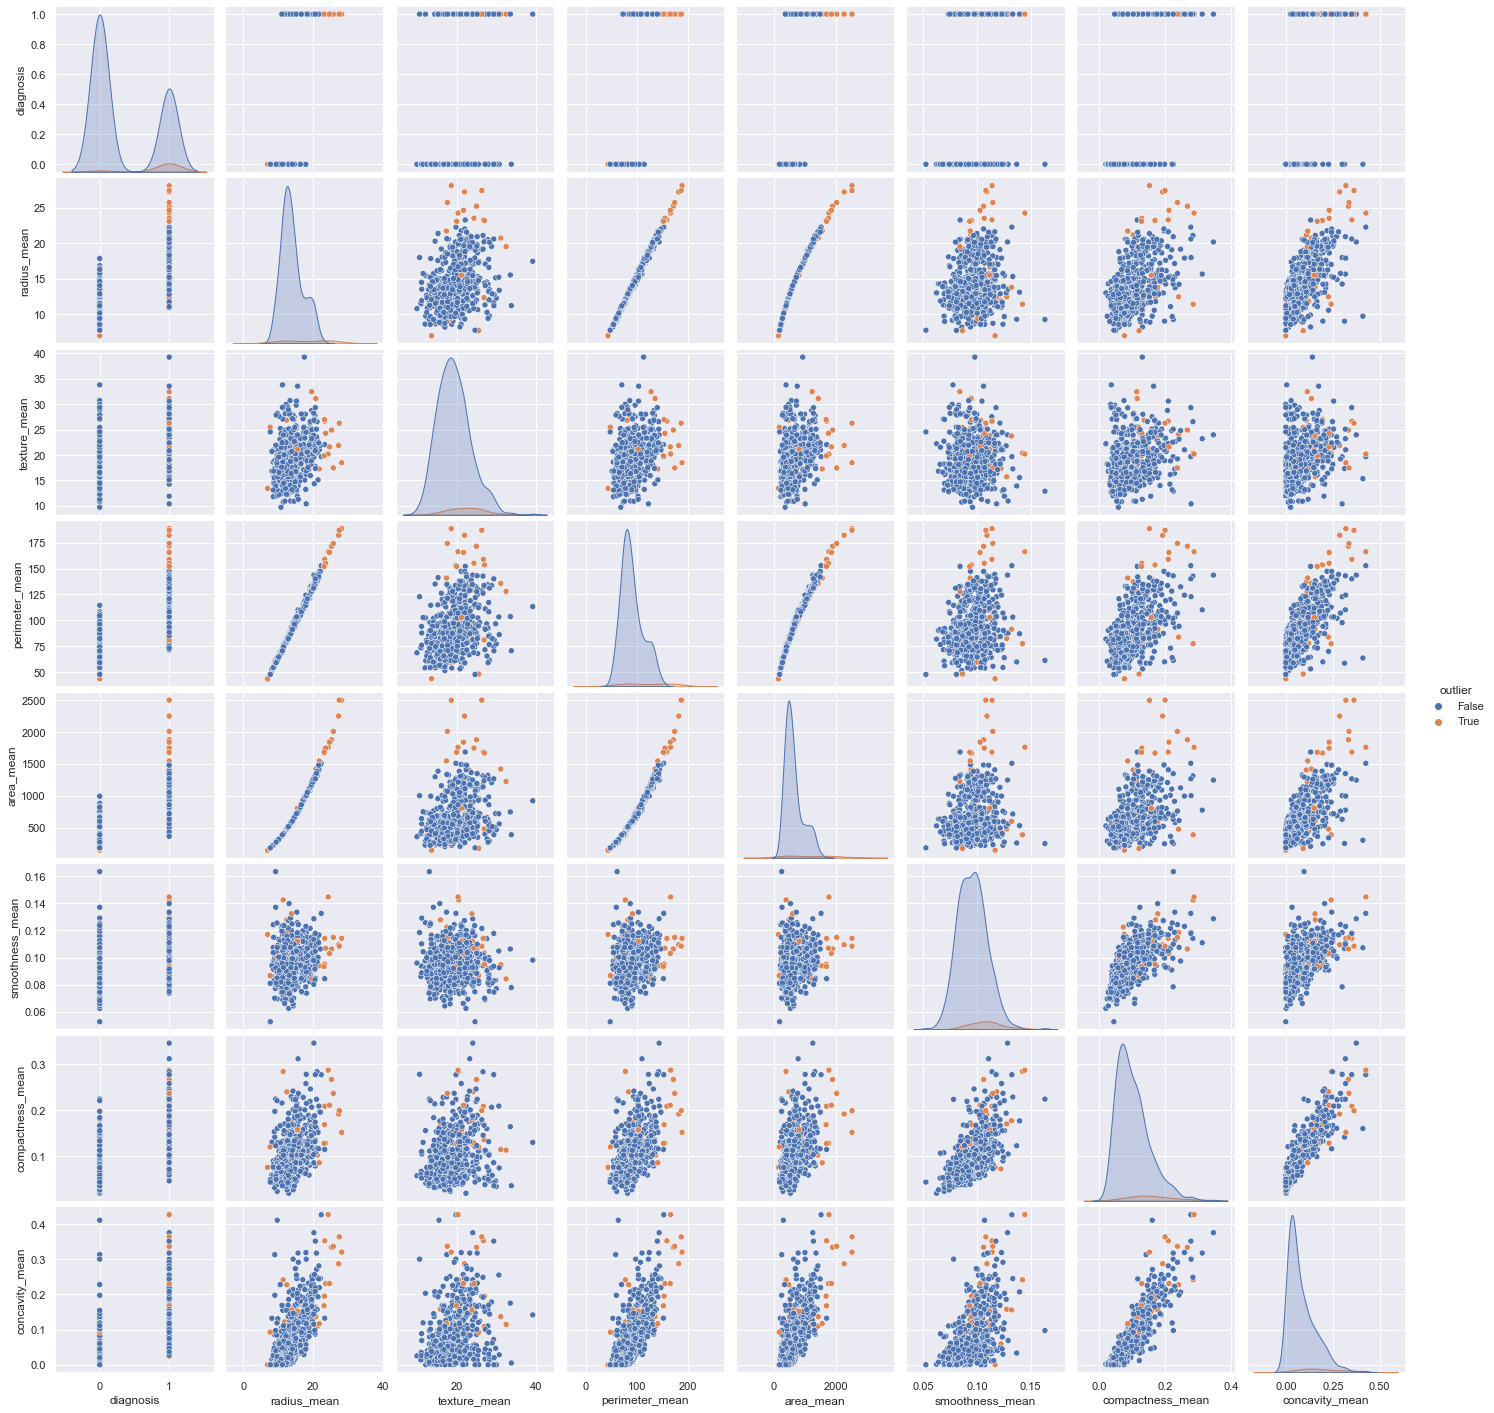

In [230]:
# toto dost zjavne nie je prave presne, asi sa treba pozriet na nastavenia LocalOutlierFactor
sns.pairplot(data, vars=data.iloc[:, :8],  hue = 'outlier')

In [232]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [233]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [265]:

from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
pipeline = make_pipeline(
    SelectKBest(chi2, k=11),
    RobustScaler()
)
X_transf = pipeline.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_transf, y, test_size=0.35, random_state=42
)

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

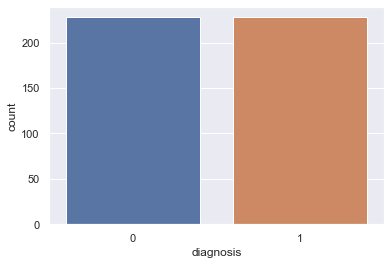

In [266]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=43, k_neighbors=30)
X_res, y_res = sm.fit_resample(X_train, y_train)


sns.countplot(y_res)

Decision tree model
---
Grid search

In [236]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


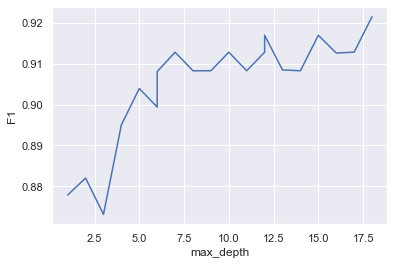

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

range_depth = np.linspace(1, 18, 21, dtype='int')
grid_parameter = {'max_depth':range_depth}
dtc = DecisionTreeClassifier()
grid_clf_1 = GridSearchCV(dtc, grid_parameter, scoring = 'recall', cv=10)
grid_clf_1.fit(X_res, y_res)
scores = grid_clf_1.cv_results_['mean_test_score']

plt.figure()
plt.plot(range_depth, scores, 'b')

plt.xlabel('max_depth')
plt.ylabel('F1')

plt.show()

In [268]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score
optimized_dtc1 = grid_clf_1.best_estimator_
pred_dtc1 = optimized_dtc1.predict(X_test)
grid_1_scores = (f1_score(y_test, pred_dtc1),
    recall_score(y_test, pred_dtc1),
    optimized_dtc1.score(X_test, y_test),
    accuracy_score(pred_dtc1, y_test),
    cross_val_score(optimized_dtc1, X_train, y_train).mean())
print("Test score: ", grid_1_scores[2])
print("Recall: ", grid_1_scores[1])
print("f1_score: ",grid_1_scores[0])

Test score:  0.94
Recall:  0.9436619718309859
f1_score:  0.9178082191780823


In [269]:
grid_parameters = {'max_depth':range_depth, 'min_samples_leaf':range_depth, 'criterion': ['gini', 'entropy']}
grid_clf_2 = GridSearchCV(dtc, grid_parameters, scoring = 'recall', cv=5, refit=True, n_jobs = -1)
grid_clf_2.fit(X_res, y_res)
grid_clf_2.best_params_

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 1}

In [270]:
grid_clf_2.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=13)

Analyze metrics


In [271]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from sklearn.model_selection import cross_val_score
optimized_dtc = grid_clf_2.best_estimator_
pred_dtc = optimized_dtc.predict(X_test)
grid_2_scores = (f1_score(y_test, pred_dtc),
    recall_score(y_test, pred_dtc),
    optimized_dtc.score(X_test, y_test),
    accuracy_score(pred_dtc, y_test),
    cross_val_score(optimized_dtc, X_res, y_res).mean())
print("Test score: ", grid_2_scores[2])
print("Recall: ", grid_2_scores[1])
print("f1_score: ",grid_2_scores[0])

Test score:  0.94
Recall:  0.8873239436619719
f1_score:  0.9130434782608696


No Skill: ROC AUC=0.500
DecisionTree: ROC AUC=0.928


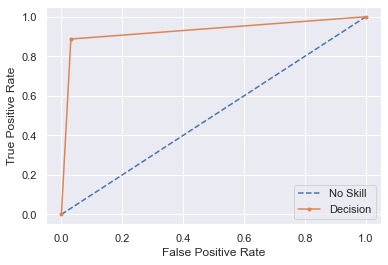

In [272]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
dtc_probs=optimized_dtc.predict_proba(X_test) #Decision tree classifier
dtc_probs=dtc_probs[:, 1]
dtc_auc = roc_auc_score(y_test, dtc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('DecisionTree: ROC AUC=%.3f' % (dtc_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dc_fpr, dc_tpr, _ = roc_curve(y_test, dtc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dc_fpr, dc_tpr, marker='.', label='Decision')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

RandomForestClassifier

In [243]:
X.head()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


In [244]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth = 10, criterion='entropy', max_features = 'auto', min_samples_split=4, random_state = 43)
RF.fit(X_res, y_res)
pred_rf = RF.predict(X_test)
print("Train score: ", round(RF.score(X_res, y_res), 8))
print("Test score: ", round(RF.score(X_test, y_test), 8))
print("Recall: ", round(recall_score(y_test, pred_rf), 8))
print("f1_score: ", round(f1_score(y_test, pred_rf), 8))

Train score:  1.0
Test score:  0.97368421
Recall:  0.97674419
f1_score:  0.96551724


In [ ]:
#cv=5

In [274]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
RF = RandomForestClassifier(random_state = 42)
range_depth = np.linspace(1, 8, 10, dtype='int')
grid_parameters = {'max_depth':range_depth, 'min_samples_leaf':range_depth, 'criterion': ['gini', 'entropy']}
grid_rf = GridSearchCV(RF, grid_parameters, scoring = 'f1', cv=5, refit=True, n_jobs=-1)
grid_rf.fit(X_res, y_res)
grid_rf.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 1}

In [279]:

optimized_rf = grid_rf.best_estimator_
pred_rf = optimized_rf.predict(X_test)
print("train score: ", round(optimized_rf.score(X_res, y_res), 2))
print("Test score: ", round(optimized_rf.score(X_test, y_test), 2))
print("Recall: ", round(recall_score(y_test, pred_rf), 2))
print("f1_score: ", round(f1_score(y_test, pred_rf), 2))


Test score:  0.96
Recall:  0.94
f1_score:  0.94


No Skill: ROC AUC=0.500
RandomForest: ROC AUC=0.990


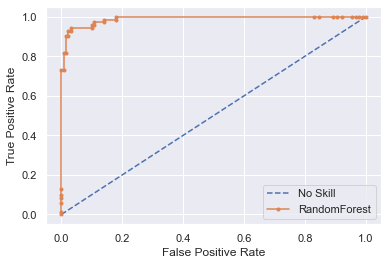

In [276]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
rfc_probs=optimized_rf.predict_proba(X_test) #Random forest classifier
rfc_probs=rfc_probs[:, 1]
rf_auc = roc_auc_score(y_test, rfc_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('RandomForest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(rf_fpr, rf_tpr, marker='.', label='RandomForest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

GradientBoostingClassifier

In [277]:

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
gbc = XGBClassifier(random_state = 43)
gbc.fit(X_res, y_res)
pred_xg = gbc.predict(X_test)
print("Train score: ", round(gbc.score(X_res, y_res), 2))
print("Test score: ", round(gbc.score(X_test, y_test), 2))
print("Recall: ", round(recall_score(y_test, pred_xg), 2))
print("f1_score: ", round(f1_score(y_test, pred_xg), 2))

Train score:  1.0
Test score:  0.96
Recall:  0.99
f1_score:  0.95


No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.996


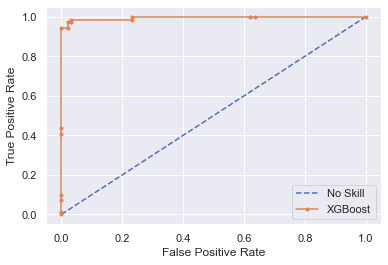

In [278]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
gbc_probs=gbc.predict_proba(X_test) #XGBoost tree classifier
gbc_probs=gbc_probs[:, 1]
xgb_auc = roc_auc_score(y_test, gbc_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (xgb_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
xg_fpr, xgb_tpr, _ = roc_curve(y_test, gbc_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(xg_fpr, xgb_tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
models = [(gbc,'XGBoost'),(optimized_dtc,'Decision tree classifier'),(RF,'Random forest classifier')]
for (model, name) in models:
    print('\nModel: ',name)
    pred = model.predict(X_test)
    print("Train score: ",round(model.score(X_res, y_res), 2))
    print("Test score: ", round(model.score(X_test, y_test), 2))
    print("recall: ",recall_score(y_test, pred))
    print("f1_score: ", f1_score(y_test, pred))


Model:  XGBoost
Train score:  1.0
Test score:  0.98
recall:  0.9767441860465116
f1_score:  0.9767441860465116

Model:  Decision tree classifier
Train score:  1.0
Test score:  0.92
recall:  0.9302325581395349
f1_score:  0.898876404494382

Model:  Random forest classifier
Train score:  1.0
Test score:  0.97
recall:  0.9767441860465116
f1_score:  0.9655172413793104


In [256]:
from sklearn.neighbors import KNeighborsClassifier

parameters2= {
            'weights': ['uniform', 'distance'],
            'n_neighbors': [5,10,20,30],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size':[25,30,35],
            'p': [1,2,3,4]
            }



clf = GridSearchCV(estimator=KNeighborsClassifier(), 
                        param_grid=parameters2,
                        cv=5,
                        refit=True,
                        error_score=0,
                        n_jobs=-1
                )

clf.fit(X_res, y_res)
print(clf.best_params_)

{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 5, 'p': 3, 'weights': 'distance'}


In [260]:
from sklearn.neighbors import KNeighborsClassifier
optimized_knn = clf.best_estimator_
optimized_knn.fit(X_res, y_res)
pred = optimized_knn.predict(X_test)


Random: ROC AUC=0.500
XGBoost: ROC AUC=0.995
Decision tree: ROC AUC=0.974
Random forest: ROC AUC=0.992
KNN: ROC AUC=0.986


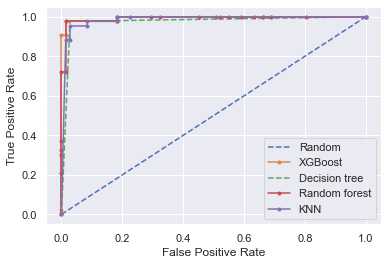

In [261]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

ns_probs = [0 for _ in range(len(y_test))]
gbc_probs=gbc.predict_proba(X_test) #XGBoost tree classifier
gbc_probs=gbc_probs[:, 1]

dtc_probs=optimized_dtc.predict_proba(X_test) #Decision tree classifier
dtc_probs=dtc_probs[:, 1]

rfc_probs=optimized_rf.predict_proba(X_test) #Random forest classifier
rfc_probs=rfc_probs[:, 1]

knn_probs=optimized_knn.predict_proba(X_test) #Decision tree classifier
knn_probs=knn_probs[:, 1]

ns_auc = roc_auc_score(y_test, ns_probs)
gbc_auc = roc_auc_score(y_test, gbc_probs)
dtc_auc = roc_auc_score(y_test, dtc_probs)
rfc_auc = roc_auc_score(y_test, rfc_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
# summarize scores
print('Random: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (gbc_auc))
print('Decision tree: ROC AUC=%.3f' % (dtc_auc))
print('Random forest: ROC AUC=%.3f' % (rfc_auc))
print('KNN: ROC AUC=%.3f' % (knn_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
gbc_fpr, gbc_tpr, _ = roc_curve(y_test, gbc_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rfc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random')
plt.plot(gbc_fpr, gbc_tpr, marker='.', label='XGBoost')
plt.plot(dtc_fpr, dtc_tpr, linestyle='--', label='Decision tree')
plt.plot(rfc_fpr, rfc_tpr, marker='.', label='Random forest')
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [264]:
models = [(gbc,'XGBoost'),(optimized_dtc,'Decision tree classifier'),(optimized_rf,'Random forest classifier'),(optimized_knn,'K nearest neighbors')]
for (model, name) in models:
    print('\nModel: ',name)
    pred = model.predict(X_test)
    print("Train score: ",round(model.score(X_res, y_res), 2))
    print("Test score: ", round(model.score(X_test, y_test), 2))
    print("recall: ", recall_score(y_test, pred))
    print("f1_score: ", f1_score(y_test, pred))


Model:  XGBoost
Train score:  1.0
Test score:  0.98
recall:  0.9767441860465116
f1_score:  0.9767441860465116

Model:  Decision tree classifier
Train score:  1.0
Test score:  0.97
recall:  0.9767441860465116
f1_score:  0.9655172413793104

Model:  Random forest classifier
Train score:  1.0
Test score:  0.98
recall:  0.9767441860465116
f1_score:  0.9767441860465116

Model:  K nearest neighbors
Train score:  1.0
Test score:  0.95
recall:  0.9534883720930233
f1_score:  0.9318181818181819
